# Project 4-Predicting Age of Abalone

# Problem Statement:
The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings 
through a microscope--a boring and time-consuming task.

Other measurements, which are easier to obtain, are used to predict the age.Further information, such as weather patterns and location (hence food availability) may be required tosolve the problem.

# Importing all the necessary Libraries:

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Loading the Data Set:

In [2]:
df=pd.read_csv('abalone.csv')
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


# Data Set Information:
There are '4177 rows'and '9 columns' in the data set,in which ,there are 8 features and one target variable.

Here,we need to predict the rings of each abalone which will lead us to the age of that abalone.

Since, the target variable cannot be classified we use Regression model to predict the rings of abalone

Attribute Information:
------------------------------

Given is the attribute name, attribute type, the measurement unit and a brief description.

The number of rings is the value to predict. 

#Name / Data Type / Measurement Unit / Description:-

Sex / nominal / -- / M, F, and I (infant)

Length / continuous / mm / Longest shell measurement

Diameter / continuous / mm / perpendicular to length

Height / continuous / mm / with meat in shell

Whole weight / continuous / grams / whole abalone

Shucked weight / continuous / grams / weight of meat

Viscera weight / continuous / grams / gut weight (after bleeding)

Shell weight / continuous / grams / after being dried

Rings / integer / -- / +1.5 gives the age in years. 

In [4]:
#checking the type of the data
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [5]:
#Getting all the values of the target variable:
df['Rings'].unique()

array([15,  7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 18, 13,  5,  4,  6, 21,
       17, 22,  1,  3, 26, 23, 29,  2, 27, 25, 24], dtype=int64)

In [6]:
#Getting data set columns information:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [7]:
df.shape # typing the shape of the data

(4177, 9)

In [8]:
#Checking the null count of all the columns of the data set:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

# Graphical analysis of the data:

Text(0.5, 1.0, 'Nominal data of sex plot')

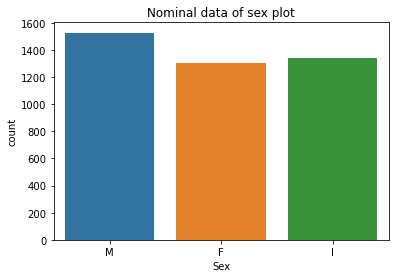

In [9]:
ax=sns.countplot('Sex',data=df)
plt.title('Nominal data of sex plot')

This the countplot of 'Sex' column ,where, the range of Male(M) is around of 1500, Female(F) is around 1300 and Infant(I) is around of 1400.

# Normal Distribution Plot:

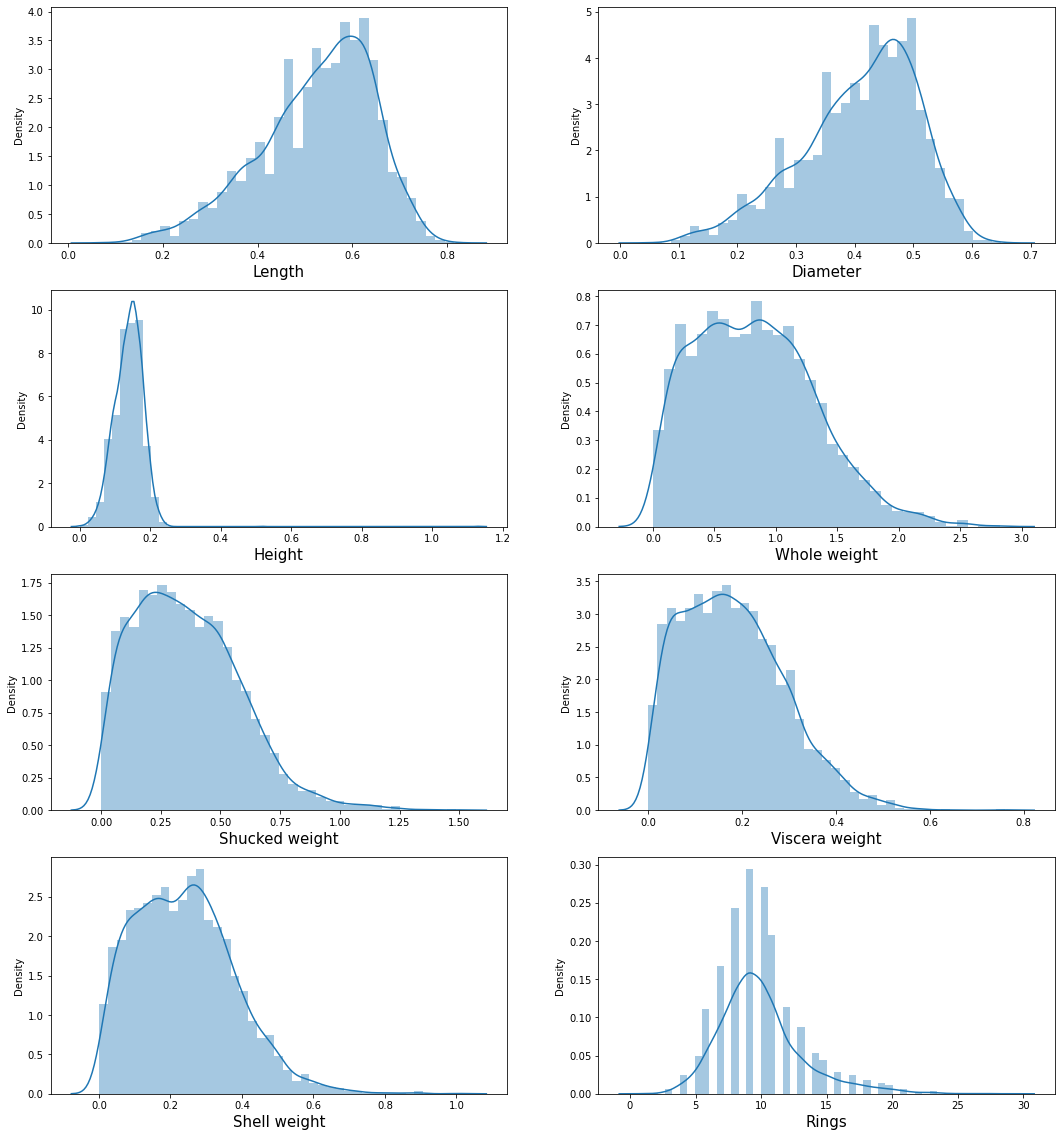

In [10]:
plt.figure(figsize=(18,20))
plotnumber=1
x=df.drop(columns='Sex')
for column in x:
    if plotnumber<=8:
        ax=plt.subplot(4,2,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()    

Visualization part is completed.

Since, there is one column 'Sex' to convert nominal data we use encoding techniques.

In [24]:
df #actual dataframe

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,sex
0,0.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,0.0
1,0.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,0.0
2,1.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,1.0
3,0.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,0.0
4,2.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,2.0
...,...,...,...,...,...,...,...,...,...,...
4172,1.0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,1.0
4173,0.0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,0.0
4174,0.0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,0.0
4175,1.0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,1.0


# Ordinal Encoder:
Ordinal Encoder is needeed to convert "Sex" feature in to ordered numeric value so that it is used to check correlaion of feautures and label

In [12]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc=OrdinalEncoder(categories=[['M','F','I']])
df['Sex']=ord_enc.fit_transform(df[['Sex']])
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,1.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,2.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,1.0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0.0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0.0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,1.0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


# Describing Data:

In [13]:
df.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.955470,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.827815,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


Since, the data seems to be normal we need to check the outliers and skewness of all the columns.
Now let's check the correlation of all the feature variable with the target.

# Correlation

# Correlation Using Heat Map

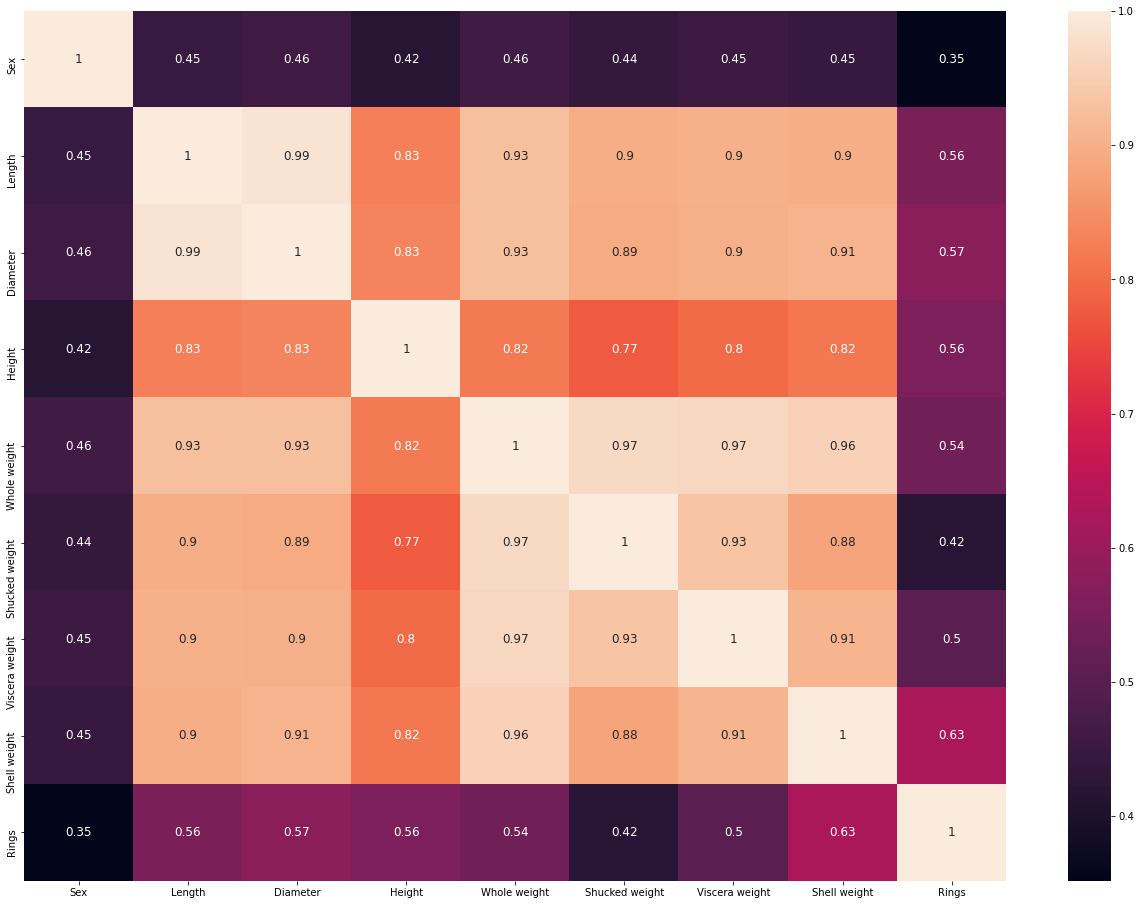

In [14]:
df_corr=df.corr().abs()

plt.figure(figsize=(22,16))
sns.heatmap(df_corr,annot=True,annot_kws={'size':12})
plt.show()  

# Outcome of Correlation:
All the features of the dataset is positively correlated with the target column 'Rings'.

Maximun correlated feature:Shell Weight

minimun correlated feature:Sex

In [15]:
corr=df.corr()
corr['Rings'].sort_values(ascending=False)

Rings             1.000000
Shell weight      0.627574
Diameter          0.574660
Height            0.557467
Length            0.556720
Whole weight      0.540390
Viscera weight    0.503819
Shucked weight    0.420884
Sex              -0.351822
Name: Rings, dtype: float64

# Correlation of Rings variable with all the 8 feature variables in the data set:

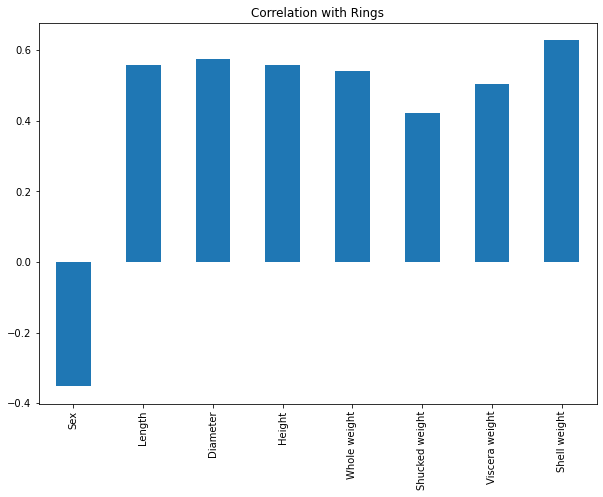

In [16]:
df.drop('Rings',axis=1).corrwith(df.Rings).plot(kind='bar',grid=False,figsize=(10,7),title='Correlation with Rings')
plt.show()

Here-> Length, Diameter, Height, Whole Weight, Viscera Weight, Shell weight are positively correlated and has good correlation with the Rings column

where as,Sex is weakly correlated with the target Rings

# Checking Skewness:

In [17]:
df.skew()

Sex               0.083056
Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

Skewness can be allowed with in the range f '+/-0.5'

Here,all the features are having less skewness 

Rings -is the target variable

# Checking outliers:

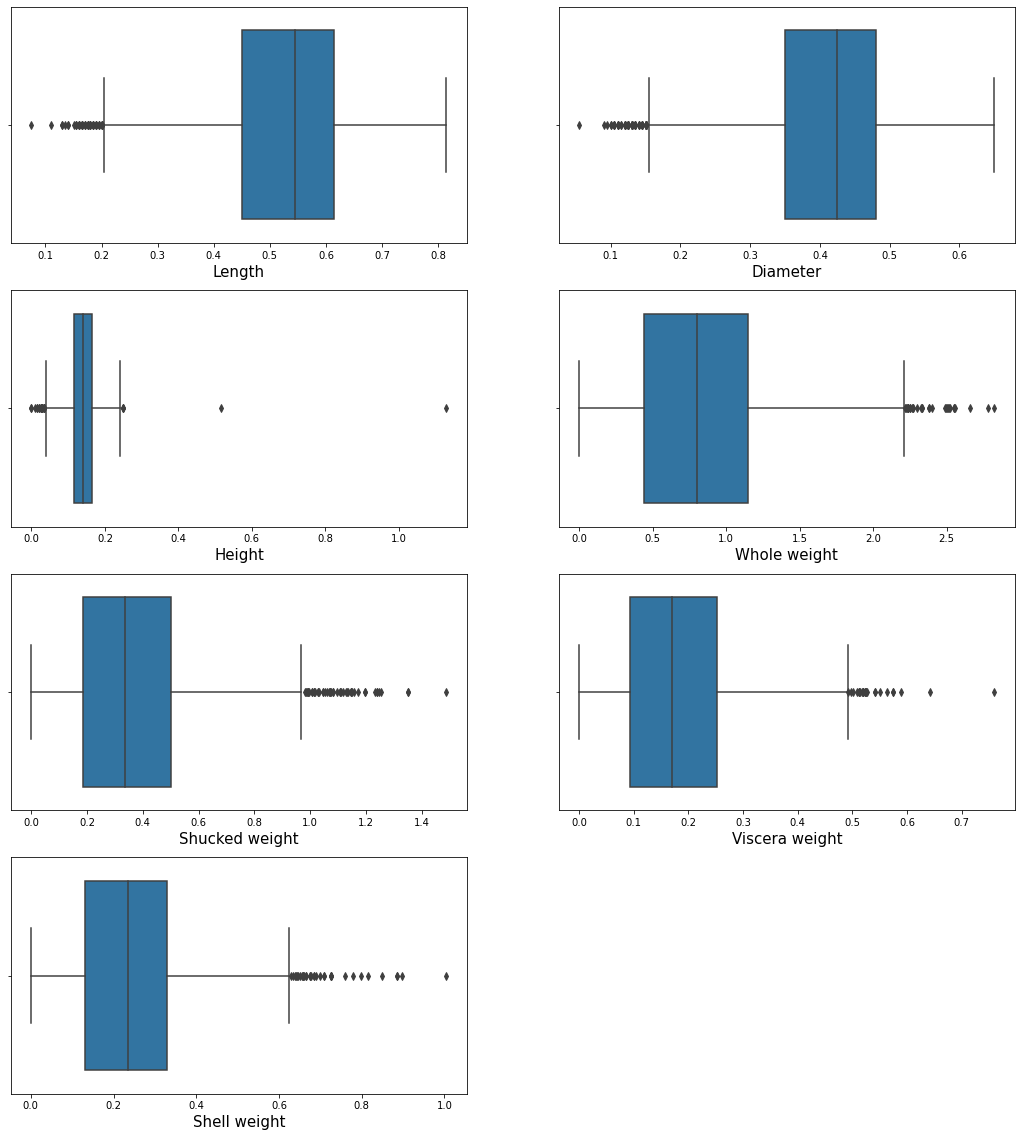

In [19]:
x=df.drop(columns=['Rings','Sex'])
plt.figure(figsize=(18,20))
graph=1
for column in x:
    if graph<=8:
        ax=plt.subplot(4,2,graph)
        sns.boxplot(x[column],orient='v')
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()   

All the feauture values seems to have some outliers ,so we need to use some techniques to remove hese extended outliers.

# Removing Outliers:

 Z Score Technique

In [20]:
from scipy.stats import zscore
import numpy as np
zsc=zscore(df)
abs_z_score=np.abs(zsc)
filtering_entry=(abs_z_score<3).all(axis=1)
df=df[filtering_entry]
df.shape

(4027, 9)

There ae 4027 rows and 9 columns after removing outliers.

In [21]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,1.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,2.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,1.0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0.0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0.0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,1.0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


# Loss Percentage:

In [22]:
loss_percent=(4177-4027)/4177*100
loss_percent

3.5910940866650707

There is negligible loss of Data after removing outliers.

# Model with desired outliers:

In [23]:
y=df['Rings']
x=df.drop(columns=['Rings'])

# Scaling:

In [24]:
from sklearn.preprocessing import StandardScaler

scalar=StandardScaler()
x_scaled=scalar.fit_transform(x)


# Imporing Libraries Modeling the Data:

In [44]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Finding the Best Random State:

In [47]:
lr=LinearRegression()
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.20,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,1)==round(r2_score(y_test,pred_test)*100,1):
        print(f'At random state-{i},the training accuracy is -{r2_score(y_train,pred_train)}')
        print(f'At random state-{i},the testing accuracy is -{r2_score(y_test,pred_test)}')
        print('\n')


At random state-34,the training accuracy is -0.5224578315720929
At random state-34,the testing accuracy is -0.5219744213389272




We have found that best random state is '34'. We will create our train-test split using this random state.

# Creating train-test split:

In [60]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.20,random_state=34)


# Linear Regression Model:

In [61]:
lr.fit(x_train,y_train)


LinearRegression()

In [62]:
pred_test=lr.predict(x_test)
pred_test

array([ 8.07660241, 10.64465641,  9.21644673,  6.60742979, 11.58360758,
        6.78626117,  7.87030228, 10.4875825 ,  7.15056591,  7.94535406,
        7.1776416 ,  7.61658499,  8.52495189,  6.35172951, 10.87266871,
       10.59548592, 10.93853981, 10.415534  , 12.32381748,  5.614587  ,
        6.10585583, 13.16050391, 12.04189422, 13.81746608,  8.99182962,
       10.36012545,  8.90219625,  8.55138373,  7.71611602,  8.22627325,
       12.62977231,  9.88803468,  6.85900522, 11.99034977, 11.79702184,
       12.39041034, 15.86402434, 11.01585272,  8.8682809 ,  9.55130229,
        9.66764641, 10.12279536, 11.70503457,  9.22183886, 10.72595365,
        8.95955057,  8.46804025,  9.26640486,  8.69829393, 13.02113838,
        9.93041454,  5.9079766 ,  9.11856398,  9.30897153, 10.33295717,
        9.2626437 ,  7.47151504, 10.06488308, 10.09634975,  8.86959957,
       11.12058879,  7.05404478,  8.71835697, 11.53250176,  6.38826057,
       10.99241392,  8.13707631, 11.74654726, 12.81441431,  8.59

In [63]:
r2_score(y_test,pred_test)

0.5219744213389272

#  CrossValidation Score:

In [65]:
training_accuracy=r2_score(y_train,pred_train)
testing_accuracy=r2_score(y_test,pred_test)
from sklearn.model_selection import cross_val_score
for i in range(2,10):
    csv=cross_val_score(lr,x_scaled,y,cv=i)
    cv_mean=csv.mean()
    print('at cv:-',i)
    print('cv score-',cv_mean*100)
    print('training_accuracy-',training_accuracy*100)
    print('testing_accuracy-',testing_accuracy*100)

at cv:- 2
cv score- 51.77244629071187
training_accuracy- -50.53381365083345
testing_accuracy- 52.19744213389272
at cv:- 3
cv score- 50.64317992709729
training_accuracy- -50.53381365083345
testing_accuracy- 52.19744213389272
at cv:- 4
cv score- 43.753626568442506
training_accuracy- -50.53381365083345
testing_accuracy- 52.19744213389272
at cv:- 5
cv score- 43.18814521080143
training_accuracy- -50.53381365083345
testing_accuracy- 52.19744213389272
at cv:- 6
cv score- 44.097325235182794
training_accuracy- -50.53381365083345
testing_accuracy- 52.19744213389272
at cv:- 7
cv score- 45.02503568532688
training_accuracy- -50.53381365083345
testing_accuracy- 52.19744213389272
at cv:- 8
cv score- 41.35238784291987
training_accuracy- -50.53381365083345
testing_accuracy- 52.19744213389272
at cv:- 9
cv score- 44.11794462128598
training_accuracy- -50.53381365083345
testing_accuracy- 52.19744213389272


Cros valiation Score at cv=2 is giving the best score.

# Linear Regression Plot:

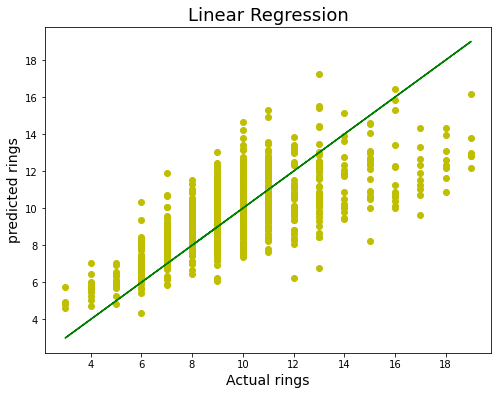

In [66]:
plt.figure(figsize=(8,6))
plt.scatter(y_test,pred_test,color='y')
plt.plot(y_test,y_test,color='g')
plt.xlabel('Actual rings',fontsize=14)
plt.ylabel('predicted rings',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

Plot to differentiate between actual and predicted target data.

# Regularisation and HyperParameter Tuning:

In [67]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

parameters={'alpha':[0.0001,.001,.01,.1,1,10], 'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 0.001, 'random_state': 0}


# Lasso Regression :

In [69]:
ls=Lasso(alpha=0.001,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)

lss=r2_score(y_test,pred_ls)
lss

0.5217021834358796

In [70]:
csv=cross_val_score(ls,x_scaled,y,cv=2)
cv_mean=csv.mean()
cv_mean

0.5178483830720022

In Lasso Model r2score is 52% and cv score is 52% .

# Using Ensemble Approach:

In [73]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor


parameters={'criterion':['mse', 'mae'],'max_features':['auto', 'sqrt', 'log2']}
rf=RandomForestRegressor()
clf=GridSe archCV(rf,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'sqrt'}


# RandomForestRegression:

In [74]:
rf=RandomForestRegressor(criterion='mse',max_features='sqrt')
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_rf=rf.predict(x_test)

rfs=r2_score(y_test,pred_rf)
print('R2 Score: ',rfs*100)

rfcsv=cross_val_score(rf,x_scaled,y,cv=2)
rf_cv_mean=rfcsv.mean()
print('Cross validation Score: ',rf_cv_mean*100)

R2 Score:  55.40675809733566
Cross validation Score:  53.757348578895424


Here,R2 Score is 55% and cv score is 54% which is performing better than Linear model.

So,RandomForestRegressor is considered.

# Saving the model:

In [75]:
import pickle
filename='abaloneageprediction.pkl'
pickle.dump(rf,open(filename,'wb'))

# Loading the Pickle File and checking the Score:

In [77]:
loaded_model=pickle.load(open('abaloneageprediction.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result)

0.5540675809733566


# Conclusion:

Here, we are displaying Original and Predicted outcome:Rings.
 
And also calculated the Origial and Predicted Age of Alabone.

In [83]:
import numpy as np
a=np.array(y_test)
predicted=np.array(rf.predict(x_test))
df_conclusion=pd.DataFrame({'Original_Rings':a,'Predicted_Rings':predicted},index=range(len(a)))
df_conclusion['Original_Age(Yrs)']=df_conclusion['Original_Rings']+1.5
df_conclusion['Predicted_Age(Yrs)']=df_conclusion['Predicted_Rings']+1.5
df_conclusion

,Original_Rings,Predicted_Rings,Original_Age(Yrs),Predicted_Age(Yrs)
0,8,7.76,9.5,9.26
1,9,10.53,10.5,12.03
2,9,10.19,10.5,11.69
3,6,6.12,7.5,7.62
4,13,11.78,14.5,13.28
...,...,...,...,...
801,7,8.91,8.5,10.41
802,6,6.31,7.5,7.81
803,11,11.30,12.5,12.80
804,6,6.06,7.5,7.56
